In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs available: {torch.cuda.device_count()}")
    print(f"Current GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch will run on CPU.")

CUDA is available!
Number of GPUs available: 1
Current GPU name: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Do this bash one time after manual upload
# !unzip "/content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels_my-project-name_2025-07-27-01-47-35.zip" -d "/content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels"

Archive:  /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels_my-project-name_2025-07-27-01-47-35.zip
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/481069944_607307268764594_8607083815216875903_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/514248472_767597876217233_6622796400109776309_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/514256693_2649060122119630_7203779970718418594_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/514272265_2477680402618063_6277110094153079785_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/518271487_1071929268418676_8607289655140878304_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/518273629_1071929385085331_1774474002956654819_n.txt  
 extracting: /content/drive/MyDrive/3CTYOLOv12/makesense_ai/labels/518312778_122123333762875760_6009396914295015118_n.txt  
 extracting: /content/drive/MyDrive/3CTYOL

## Prepare images and corresponding labels in YOLO format 

In [ ]:
import os
import random
import shutil

HOME = "/content/drive/MyDrive/3CTYOLOv12/makesense_ai/"

# Set your directory path
labels_dir = f"{HOME}/labels"

# Get all label .txt filenames (without extension)
all_labels = [f[:-4] for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Shuffle for randomness
random.shuffle(all_labels)

# Set your split sizes
num_test  = 10
num_val   = 30
num_train = len(all_labels) - num_test - num_val

# Split into test, val, train
test_labels  = all_labels[:num_test]
val_labels   = all_labels[num_test:num_test + num_val]
train_labels = all_labels[num_test + num_val:]

# Create target label directories
for split in ["train", "val", "test"]:
    os.makedirs(f"{HOME}/{split}/labels", exist_ok=True)

# Function to copy label files
def copy_labels(label_list, split):
    for label in label_list:
        src = os.path.join(labels_dir, f"{label}.txt")
        dst = os.path.join(HOME, split, "labels", f"{label}.txt")
        shutil.copy2(src, dst)

# Copy the actual files
copy_labels(train_labels, "train")
copy_labels(val_labels, "val")
copy_labels(test_labels, "test")

# We do not need this step 
# Also save the list of base filenames (optional)
def save_list_to_txt(list_data, path):
    with open(path, 'w') as f:
        for item in list_data:
            f.write(f"{item}\n")

save_list_to_txt(train_labels, HOME + "train/labels.txt")
save_list_to_txt(val_labels, HOME + "val/labels.txt")
save_list_to_txt(test_labels, HOME + "test/labels.txt")

print(f" Saved & copied files:\n  Train: {len(train_labels)}\n  Val: {len(val_labels)}\n  Test: {len(test_labels)}")

✅ Saved & copied files:
  Train: 347
  Val: 30
  Test: 10


In [ ]:
import shutil
# Remove the entire 'labels' directory and its contents
if os.path.exists(labels_dir):
    shutil.rmtree(labels_dir)
    print("Labels directory removed.")
else:
    print("Labels directory does not exist.")

Labels directory removed.


In [ ]:
import os
import shutil

ALL_IMAGES_DIR = "/content/drive/MyDrive/3CTYOLOv12/VGG(VIA)/images"
splits = ["train", "val", "test"]
image_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

for split in splits:
    labels_dir = os.path.join(HOME, split, "labels")
    images_dir = os.path.join(HOME, split, "images")
    os.makedirs(images_dir, exist_ok=True)

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        base_name = os.path.splitext(label_file)[0]  # remove .txt
        image_found = False

        for ext in image_extensions:
            possible_image = os.path.join(ALL_IMAGES_DIR, base_name + ext)
            if os.path.exists(possible_image):
                shutil.copy(possible_image, os.path.join(images_dir, base_name + ext))
                image_found = True
                break

        if not image_found:
            print(f"[Warning] No image found for label: {label_file}")

[Warning] No image found for label: imagesuu.txt
[Warning] No image found for label: MercedesWithothers.txt


note: the following 2 images are missing so we uploaded them manuly
- [Warning] No image found for label: imagesuu.txt
- [Warning] No image found for label: MercedesWithothers.txt

In [ ]:
for split in splits:
    images_dir = os.path.join(HOME, split, "images")
    count = len([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
    print(f"{split}/images: {count} images")

train/images: 345 images
val/images: 30 images
test/images: 10 images


In [ ]:
for split in splits:
    images_dir = os.path.join(HOME, split, "images")
    count = len([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
    print(f"{split}/images: {count} images")

train/images: 347 images
val/images: 30 images
test/images: 10 images


In [ ]:
import os
import pandas as pd
import json
from PIL import Image

In [ ]:
HOME = "/content/drive/MyDrive/3CTYOLOv12/makesense_ai/"
CLASS_NAMES = ["BMW", "mercedes-benz"]

### Goal: YOLO Dataset Structure


```
YOLO/
├── train/
│   ├── images/
│   └── labels/
├── val/
│   ├── images/
│   └── labels/
└── test/
    ├── images/
    └── labels/
```

Split Logic

Total = All labeled images (those that have a .txt in labels/)

Test = 10 samples

Val = 30 samples

Train = remaining

# How to Train YOLOv12 Object Detection on a Custom Dataset

---

[YOLOv12](https://github.com/sunsmarterjie/yolov12) is a newly proposed attention-centric variant of the YOLO family that focuses on incorporating efficient attention mechanisms into the backbone while preserving real-time performance. Instead of relying heavily on CNN-based architectures like its predecessors, YOLOv12 introduces a simple yet powerful “area attention” module, which strategically partitions the feature map to reduce the quadratic complexity of full self-attention. It also adopts residual efficient layer aggregation networks (R-ELAN) to enhance feature aggregation and training stability, especially for larger models. These innovations, together with refinements such as scaled residual connections and a reduced MLP ratio, enable YOLOv12 to harness the benefits of attention (e.g., better global context modeling) without sacrificing speed.


Compared to prior YOLO iterations (e.g., YOLOv10, YOLOv11, and YOLOv8), YOLOv12 achieves higher detection accuracy with competitive or faster inference times across all model scales. Its five sizes—N, S, M, L, and X—range from 2.6M to 59.1M parameters, striking a strong accuracy–speed balance. For instance, the smallest YOLOv12-N surpasses other “nano” models by over 1% mAP with latency around 1.6 ms on a T4 GPU, and the largest YOLOv12-X achieves 55.2% mAP, comfortably outscoring comparable real-time detectors such as RT-DETR and YOLOv11-X . By matching or exceeding state-of-the-art accuracy while remaining fast, YOLOv12 represents a notable step forward for attention-based real-time object detection.

![yolov12-metrics](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov12-metrics.png)

## Environment setup

### Configure your API keys

To fine-tune YOLOv12, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [ ]:
import os
from google.colab import userdata

### Check GPU availability

**NOTE:** **YOLOv12 leverages FlashAttention to speed up attention-based computations, but this feature requires an Nvidia GPU built on the Ampere architecture or newer—for example, GPUs like the RTX 3090, RTX 3080, or even the Nvidia L4 meet this requirement.**

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Jul 30 11:35:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install dependencies

**NOTE:** Currently, YOLOv12 does not have its own PyPI package, so we install it directly from GitHub while also adding roboflow (to conveniently pull datasets from the Roboflow Universe), supervision (to visualize inference results and benchmark the model’s performance), and flash-attn (to accelerate attention-based computations via optimized CUDA kernels).

In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Run inference

In the example, we're using the `yolov12l.pt` model, but you can experiment with different model sizes by simply swapping out the model name during initialization. Options include `yolov12n.pt`, `yolov12s.pt`, `yolov12m.pt`, `yolov12l.pt`, and `yolov12x.pt`.

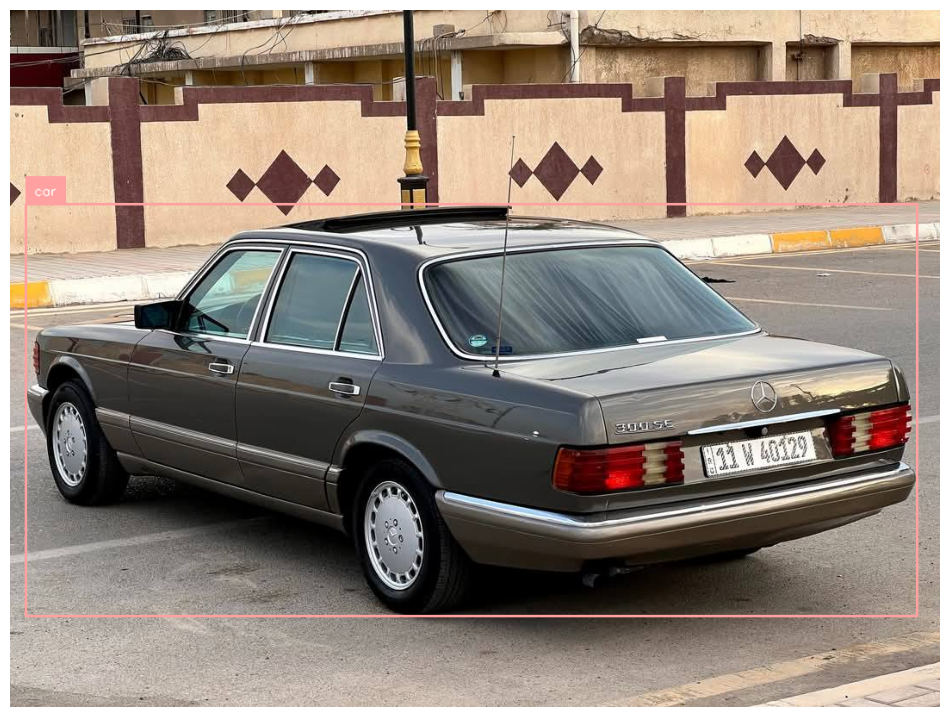

In [ ]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = "/content/drive/MyDrive/3CTYOLOv12/makesense_ai/train/images/514246554_122122681442906938_1324248585974944421_n.jpg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results    = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator   = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

# Create data.yaml

In [ ]:
import os
import shutil

dataset_location = "/content/drive/MyDrive/3CTYOLOv12/makesense_ai"
data_yaml_path = os.path.join(dataset_location, "data.yaml")

# Step 1: Delete the folder if it's a directory named 'data.yaml'
if os.path.isdir(data_yaml_path):
    shutil.rmtree(data_yaml_path)

# Step 2: Create and write to the correct data.yaml file
class_names = ["BMW", "mercedes-benz"]

with open(data_yaml_path, "w") as f:
    f.write(f"path: {dataset_location}\n")
    f.write("train: train/images\n")
    f.write("val: val/images\n")
    f.write("test: test/images\n")
    f.write(f"names: {class_names}\n")
    f.write(f"nc: {len(class_names)}\n")

**NOTE:** We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following bash commands to prepare your dataset for training by updating the relative paths in the `data.yaml` file, ensuring it correctly points to the subdirectories for your dataset's `train`, `test`, and `valid` subsets.

## Fine-tune YOLOv12 model

We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 100 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(
                    data=f"{data_yaml_path}",
                    epochs=100
                    )

New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/drive/MyDrive/3CTYOLOv12/makesense_ai/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 93.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/3CTYOLOv12/makesense_ai/train/labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/3CTYOLOv12/makesense_ai/val/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.69G      3.164      3.985       4.31         33        640: 100%|██████████| 22/22 [01:18<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         30         32    0.00272      0.625    0.00421    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.83G      3.087      3.871      4.164         25        640: 100%|██████████| 22/22 [00:58<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         30         32    0.00294      0.625    0.00538    0.00247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.84G      2.977      3.775      3.948         22        640: 100%|██████████| 22/22 [01:04<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30         32    0.00244      0.625    0.00453    0.00164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.66G      2.928      3.636      3.721         26        640: 100%|██████████| 22/22 [00:58<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         30         32     0.0026      0.667     0.0161    0.00484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.66G      2.797      3.487      3.493         19        640: 100%|██████████| 22/22 [01:00<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         30         32    0.00404      0.692     0.0236    0.00815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.67G      2.756      3.427      3.348         25        640: 100%|██████████| 22/22 [01:00<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         30         32    0.00305      0.867     0.0143    0.00323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.66G      2.656      3.304      3.222         29        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         30         32      0.311     0.0667     0.0478      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.67G      2.557      3.228      3.156         24        640: 100%|██████████| 22/22 [01:10<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         30         32     0.0606      0.408     0.0471     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.66G      2.424      3.161      3.125         22        640: 100%|██████████| 22/22 [01:00<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         30         32     0.0151      0.167     0.0161    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.67G      2.416      3.153      3.057         27        640: 100%|██████████| 22/22 [00:56<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         30         32     0.0397      0.292     0.0439     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.66G       2.45      3.015      3.061         28        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30         32     0.0202      0.167     0.0299    0.00966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.67G      2.385      3.054      2.979         23        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         32     0.0158      0.333     0.0214    0.00709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.66G      2.359      2.944      2.953         26        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         30         32     0.0667      0.258     0.0621      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.67G      2.359      2.882      2.951         26        640: 100%|██████████| 22/22 [00:54<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30         32     0.0644      0.293      0.217     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.66G      2.294       2.86      2.935         21        640: 100%|██████████| 22/22 [00:57<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         30         32      0.156      0.183     0.0846     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.67G      2.291      2.771      2.895         17        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         30         32      0.394     0.0667      0.101     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.66G      2.231      2.775      2.829         22        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         32      0.275      0.186      0.112     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.67G       2.16      2.677        2.8         26        640: 100%|██████████| 22/22 [00:49<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         30         32      0.022       0.05     0.0164    0.00586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.66G      2.142      2.614      2.784         26        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         30         32      0.481      0.208      0.247     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.67G      2.086      2.551      2.739         28        640: 100%|██████████| 22/22 [00:48<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32     0.0542       0.25      0.088     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.66G      2.021       2.53       2.71         26        640: 100%|██████████| 22/22 [00:51<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         30         32      0.282      0.258      0.239     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.67G      2.066      2.507      2.707         26        640: 100%|██████████| 22/22 [00:47<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         30         32      0.257      0.583      0.302      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.66G      1.977      2.455      2.636         19        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         32      0.327      0.475      0.289       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.67G       2.01      2.467       2.66         24        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         30         32        0.3      0.581      0.302      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.66G      1.901      2.417      2.601         26        640: 100%|██████████| 22/22 [00:47<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         30         32      0.336      0.599       0.39      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.67G       1.86      2.323      2.526         22        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32      0.376      0.525      0.381      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.66G      1.819      2.195      2.467         26        640: 100%|██████████| 22/22 [00:50<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         32      0.313      0.525      0.374      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.67G      1.879      2.275      2.533         17        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         30         32      0.313      0.467      0.368      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.66G      1.759      2.193      2.414         27        640: 100%|██████████| 22/22 [00:53<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         30         32      0.333      0.591      0.401      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.67G      1.795      2.173       2.45         24        640: 100%|██████████| 22/22 [00:48<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         30         32      0.385      0.625        0.4      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.66G      1.747       2.07      2.393         20        640: 100%|██████████| 22/22 [00:46<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         30         32      0.357      0.575      0.455      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.67G      1.698      2.024      2.357         24        640: 100%|██████████| 22/22 [00:52<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         30         32      0.366      0.558      0.415      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.66G      1.693      2.056      2.314         20        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         32      0.414      0.484      0.404      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.67G      1.695      2.052      2.314         26        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         32      0.424      0.608      0.465      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.66G      1.635       1.93      2.255         27        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         30         32      0.434      0.624       0.47       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.67G        1.6      1.856      2.236         26        640: 100%|██████████| 22/22 [00:47<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         32      0.379      0.608      0.419      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.66G       1.58      1.813      2.216         26        640: 100%|██████████| 22/22 [00:52<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         30         32      0.407      0.717      0.391      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.67G      1.523      1.825      2.184         28        640: 100%|██████████| 22/22 [00:47<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         30         32      0.327      0.671      0.405      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.66G       1.54       1.84      2.178         25        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         30         32       0.41      0.708      0.475      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.67G       1.49      1.776      2.123         19        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         32      0.381      0.625      0.453      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.66G      1.437      1.743      2.073         19        640: 100%|██████████| 22/22 [00:56<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         30         32      0.335      0.683      0.473      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.67G      1.444      1.715      2.075         23        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         30         32      0.433        0.7      0.545       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.66G      1.535       1.78      2.157         24        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         30         32      0.343      0.748      0.381      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.67G      1.456      1.731      2.101         29        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         30         32      0.391      0.733      0.416      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.66G      1.439      1.668       2.07         29        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         32      0.449      0.848      0.491      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.67G      1.387      1.651      2.044         34        640: 100%|██████████| 22/22 [00:50<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         30         32      0.345      0.772      0.541      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.66G      1.362      1.622      1.988         23        640: 100%|██████████| 22/22 [00:49<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         30         32      0.388      0.792      0.513      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.67G      1.353      1.629      1.987         31        640: 100%|██████████| 22/22 [00:48<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         30         32      0.464      0.842      0.545      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.66G      1.303      1.568      1.927         23        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         32      0.542      0.611      0.538       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.67G      1.324      1.544      1.925         24        640: 100%|██████████| 22/22 [00:47<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         32      0.469      0.842      0.583      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.66G      1.365      1.576      1.979         34        640: 100%|██████████| 22/22 [00:49<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         30         32      0.369      0.825      0.564      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.67G      1.314      1.528      1.935         27        640: 100%|██████████| 22/22 [00:47<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         30         32      0.451      0.767      0.525      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.66G      1.284      1.497       1.92         15        640: 100%|██████████| 22/22 [00:51<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30         32      0.413      0.617      0.443      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.69G      1.245      1.472      1.866         24        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         30         32      0.456      0.854      0.585      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.66G       1.27       1.53      1.885         24        640: 100%|██████████| 22/22 [00:48<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         30         32       0.54      0.617      0.558      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.67G       1.28      1.493      1.892         22        640: 100%|██████████| 22/22 [00:51<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         30         32      0.436      0.775      0.576      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.66G      1.248       1.46      1.841         20        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         30         32      0.612      0.572      0.601       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.67G      1.248      1.492      1.849         21        640: 100%|██████████| 22/22 [00:49<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         30         32      0.424      0.908      0.565      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.66G      1.198      1.456      1.822         14        640: 100%|██████████| 22/22 [00:49<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         32      0.526      0.742      0.656      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.69G      1.241      1.433      1.817         23        640: 100%|██████████| 22/22 [00:50<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         32      0.478      0.677      0.583      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.66G      1.279      1.479      1.865         26        640: 100%|██████████| 22/22 [00:51<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         32      0.509      0.816      0.645      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.67G        1.2      1.432      1.803         27        640: 100%|██████████| 22/22 [00:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         32       0.47      0.683      0.527      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.66G      1.248      1.484      1.832         25        640: 100%|██████████| 22/22 [00:48<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         30         32      0.455      0.848      0.541      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.67G      1.136      1.402       1.74         18        640: 100%|██████████| 22/22 [00:51<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         30         32       0.45      0.783      0.615      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.66G      1.164      1.406      1.759         22        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         30         32      0.621      0.759      0.649      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.67G        1.2      1.413      1.804         22        640: 100%|██████████| 22/22 [00:49<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30         32      0.565      0.633      0.647      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.66G      1.125       1.35      1.737         21        640: 100%|██████████| 22/22 [00:46<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         30         32      0.448      0.883      0.617      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.67G      1.169      1.364      1.778         21        640: 100%|██████████| 22/22 [00:52<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         30         32      0.564      0.792       0.66       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.66G      1.056      1.314      1.659         25        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         30         32      0.466      0.758      0.631      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.69G      1.117      1.342      1.737         31        640: 100%|██████████| 22/22 [00:48<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30         32       0.43      0.875      0.552      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.66G      1.048      1.306      1.645         25        640: 100%|██████████| 22/22 [00:50<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         30         32      0.602      0.676      0.668      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.67G      1.073      1.319      1.685         25        640: 100%|██████████| 22/22 [00:47<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         30         32        0.5       0.85      0.675      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.66G      1.118      1.309      1.696         20        640: 100%|██████████| 22/22 [00:48<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         30         32      0.573      0.798      0.668       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.67G      1.109      1.322      1.717         31        640: 100%|██████████| 22/22 [00:45<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         32      0.554      0.833      0.666      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.66G      1.113       1.31      1.699         20        640: 100%|██████████| 22/22 [00:52<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         32      0.459      0.892      0.632      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.67G      1.061      1.261      1.638         17        640: 100%|██████████| 22/22 [00:47<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32      0.531      0.837      0.619      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.66G      1.057      1.319      1.681         19        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         30         32      0.516       0.86      0.628      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.67G      1.022      1.247      1.645         29        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         30         32      0.573      0.783      0.635      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.66G      1.112      1.294      1.701         34        640: 100%|██████████| 22/22 [00:45<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         30         32      0.481      0.823      0.573      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.67G      1.006      1.184      1.612         21        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32      0.524      0.825      0.665      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.66G      1.064      1.255      1.631         20        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         32      0.485      0.864      0.663      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.67G      1.062      1.269      1.645         18        640: 100%|██████████| 22/22 [00:51<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         30         32      0.456      0.855      0.549      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.66G      1.054      1.288      1.659         26        640: 100%|██████████| 22/22 [00:53<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         32      0.507       0.89       0.58      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.67G     0.9914        1.2      1.597         29        640: 100%|██████████| 22/22 [00:49<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         32      0.436      0.826      0.609      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.66G      1.003      1.207        1.6         28        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         30         32      0.564      0.881      0.645      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.67G      1.041       1.24      1.643         32        640: 100%|██████████| 22/22 [00:47<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         30         32      0.519      0.824      0.555       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.66G      1.007      1.206      1.595         26        640: 100%|██████████| 22/22 [00:48<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         32      0.453      0.925      0.616      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.67G     0.9855      1.164      1.572         25        640: 100%|██████████| 22/22 [00:50<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         30         32      0.577      0.825      0.693      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.66G      1.006      1.215      1.591         31        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         32      0.502       0.95      0.604      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.67G     0.9574      1.166      1.558         21        640: 100%|██████████| 22/22 [00:49<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         30         32      0.525      0.902      0.576      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.66G      0.786      1.148      1.447         12        640: 100%|██████████| 22/22 [01:07<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32      0.527      0.842      0.587      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.67G     0.7793      1.032      1.415          9        640: 100%|██████████| 22/22 [00:54<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         32       0.54      0.817      0.685      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.66G     0.7651     0.9992      1.423          9        640: 100%|██████████| 22/22 [00:53<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         30         32      0.544      0.811      0.655      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.67G     0.7561       1.01      1.405         11        640: 100%|██████████| 22/22 [00:54<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         30         32       0.52       0.85      0.599      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.66G     0.7467      0.942      1.408          9        640: 100%|██████████| 22/22 [00:46<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         32      0.521      0.783      0.581      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.67G     0.7367     0.9717       1.38          9        640: 100%|██████████| 22/22 [00:48<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30         32       0.49      0.858      0.606      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.66G     0.7494     0.9309      1.408          9        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30         32      0.529      0.855      0.635      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.67G     0.7228     0.9423      1.353         10        640: 100%|██████████| 22/22 [00:51<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         30         32      0.483      0.858      0.591       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.66G     0.7009     0.9323      1.331          9        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         30         32      0.491      0.833      0.577      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.67G     0.7112     0.9091      1.373         10        640: 100%|██████████| 22/22 [00:55<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         32      0.497      0.858      0.626      0.486



100 epochs completed in 1.560 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


                   all         30         32      0.576      0.825      0.693      0.525
                   BMW         19         20       0.71        0.9      0.773      0.612
         mercedes-benz         12         12      0.443       0.75      0.612      0.439
Speed: 0.4ms preprocess, 11.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


## Evaluate fine-tuned YOLOv12 model

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1980.jpg
events.out.tfevents.1753875372.eb8fe8144551.3733.0  train_batch1981.jpg
F1_curve.png					    train_batch1982.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


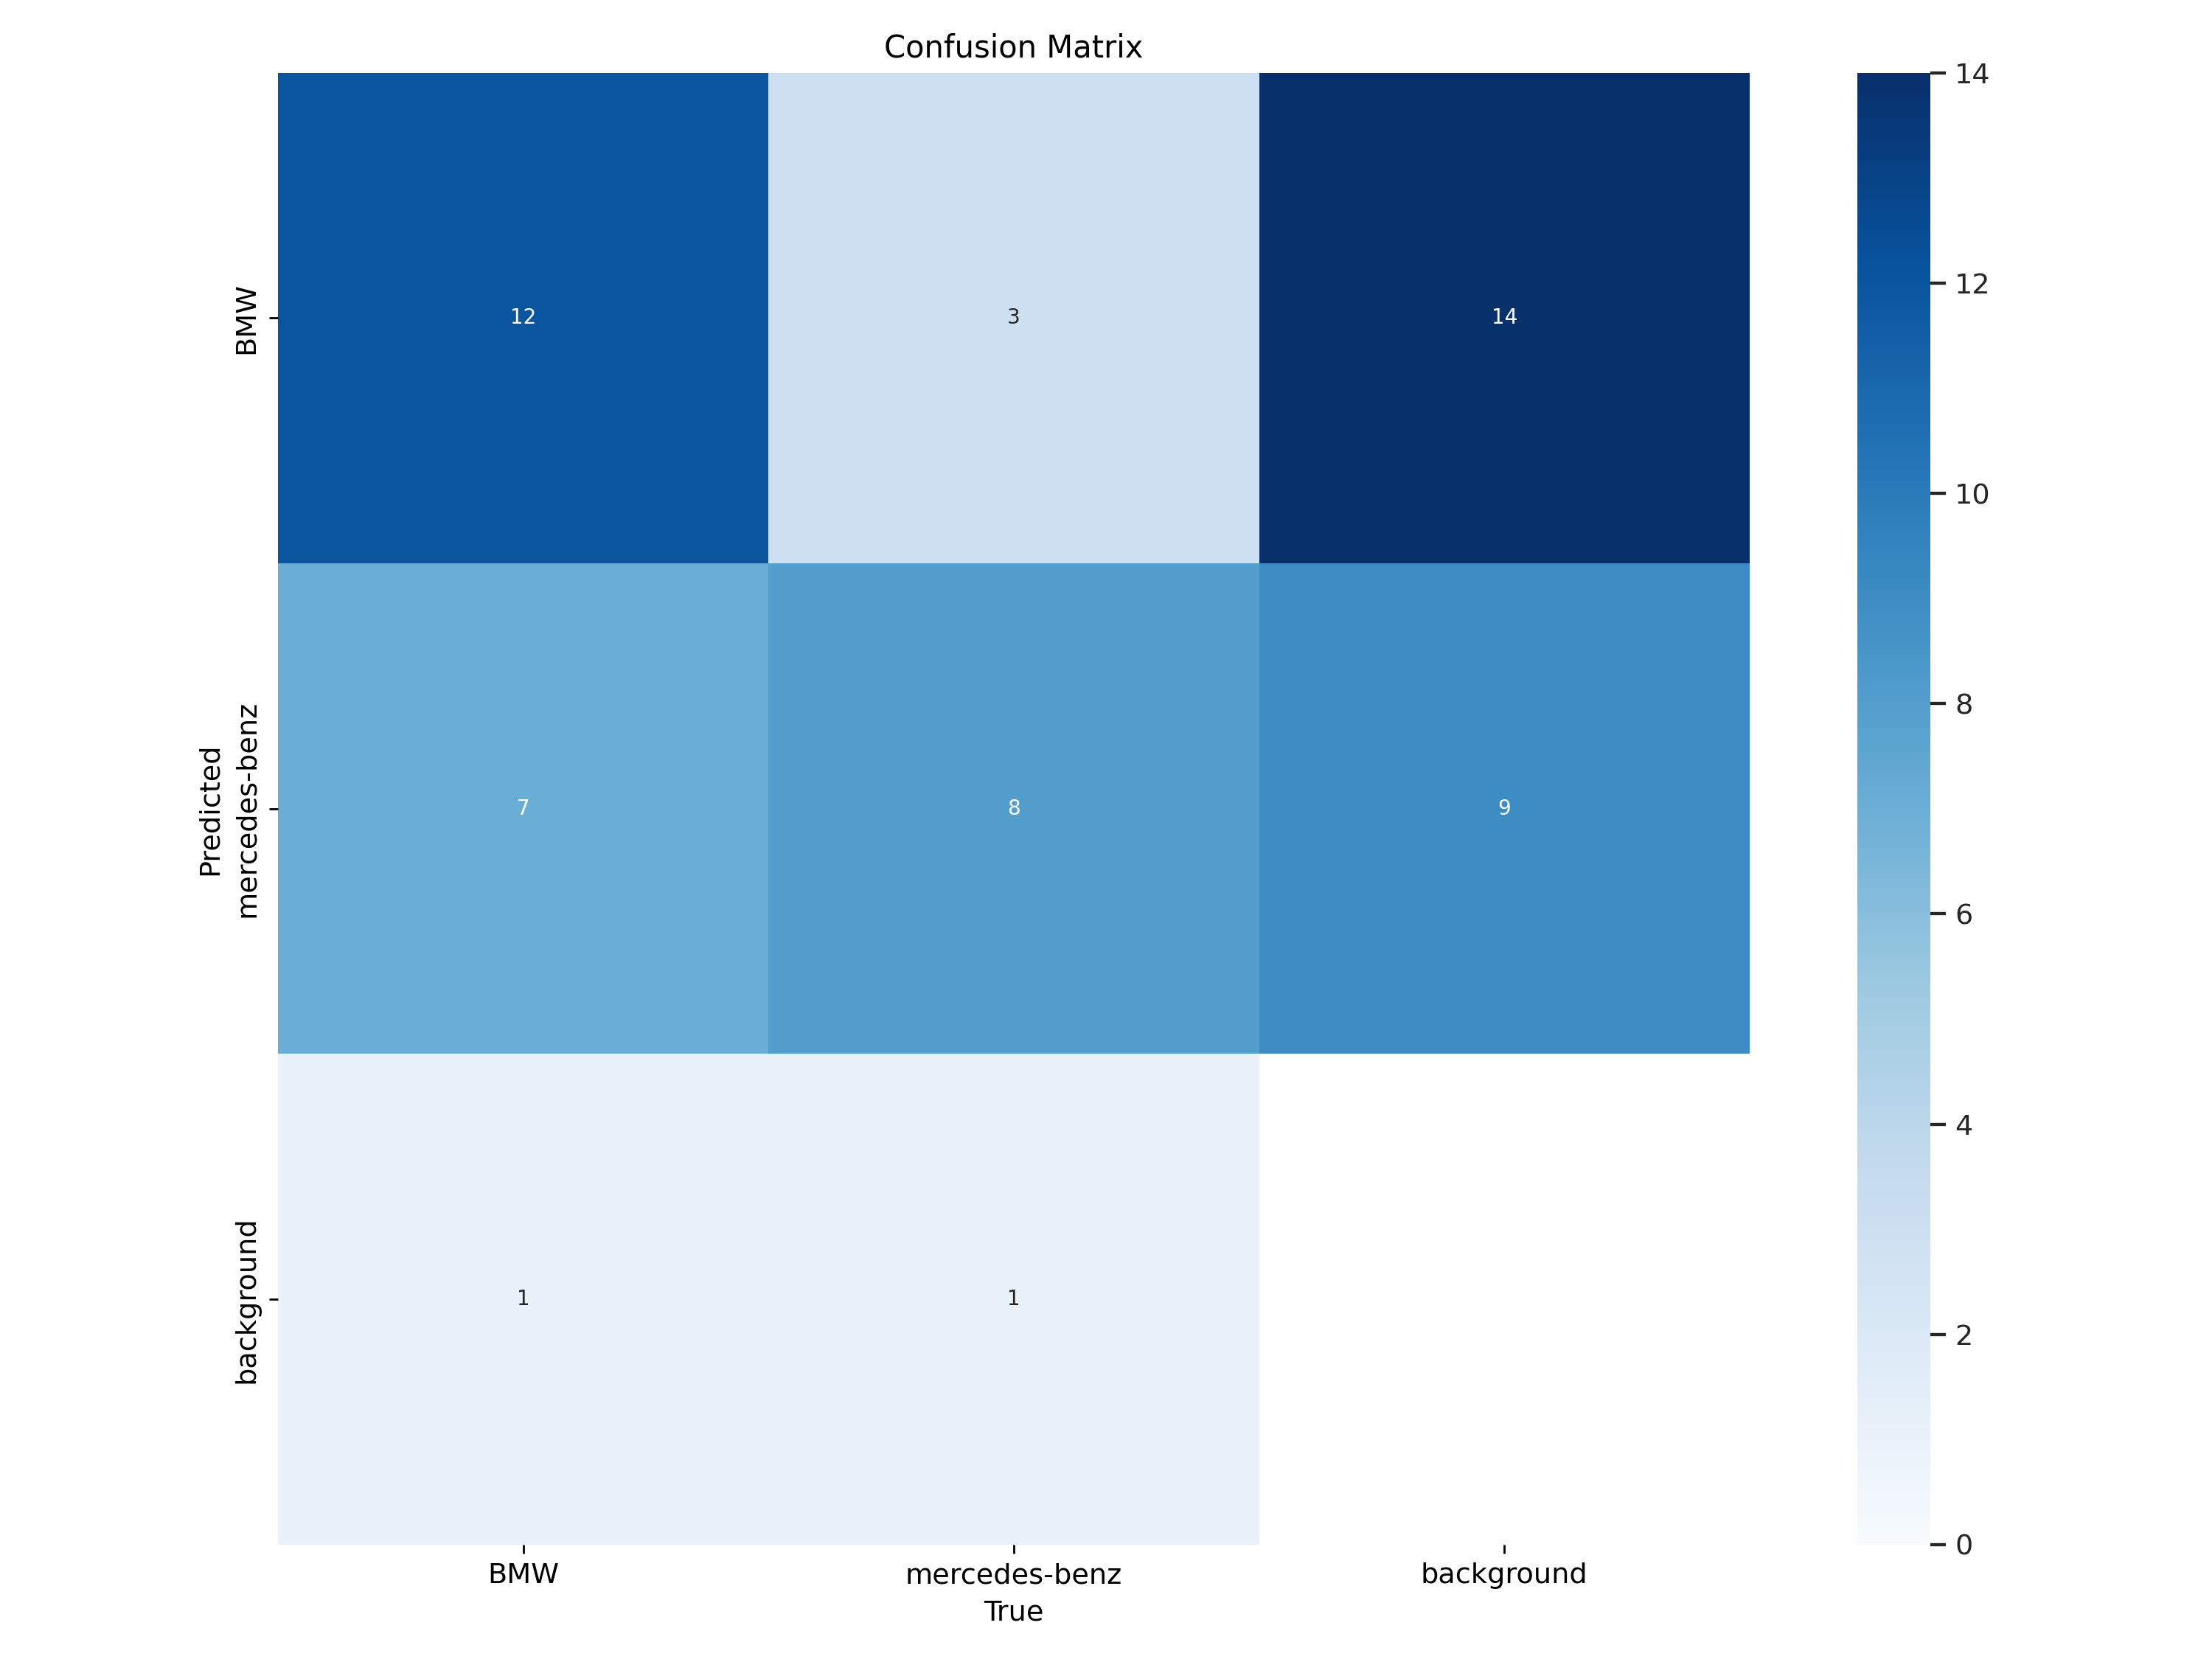

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

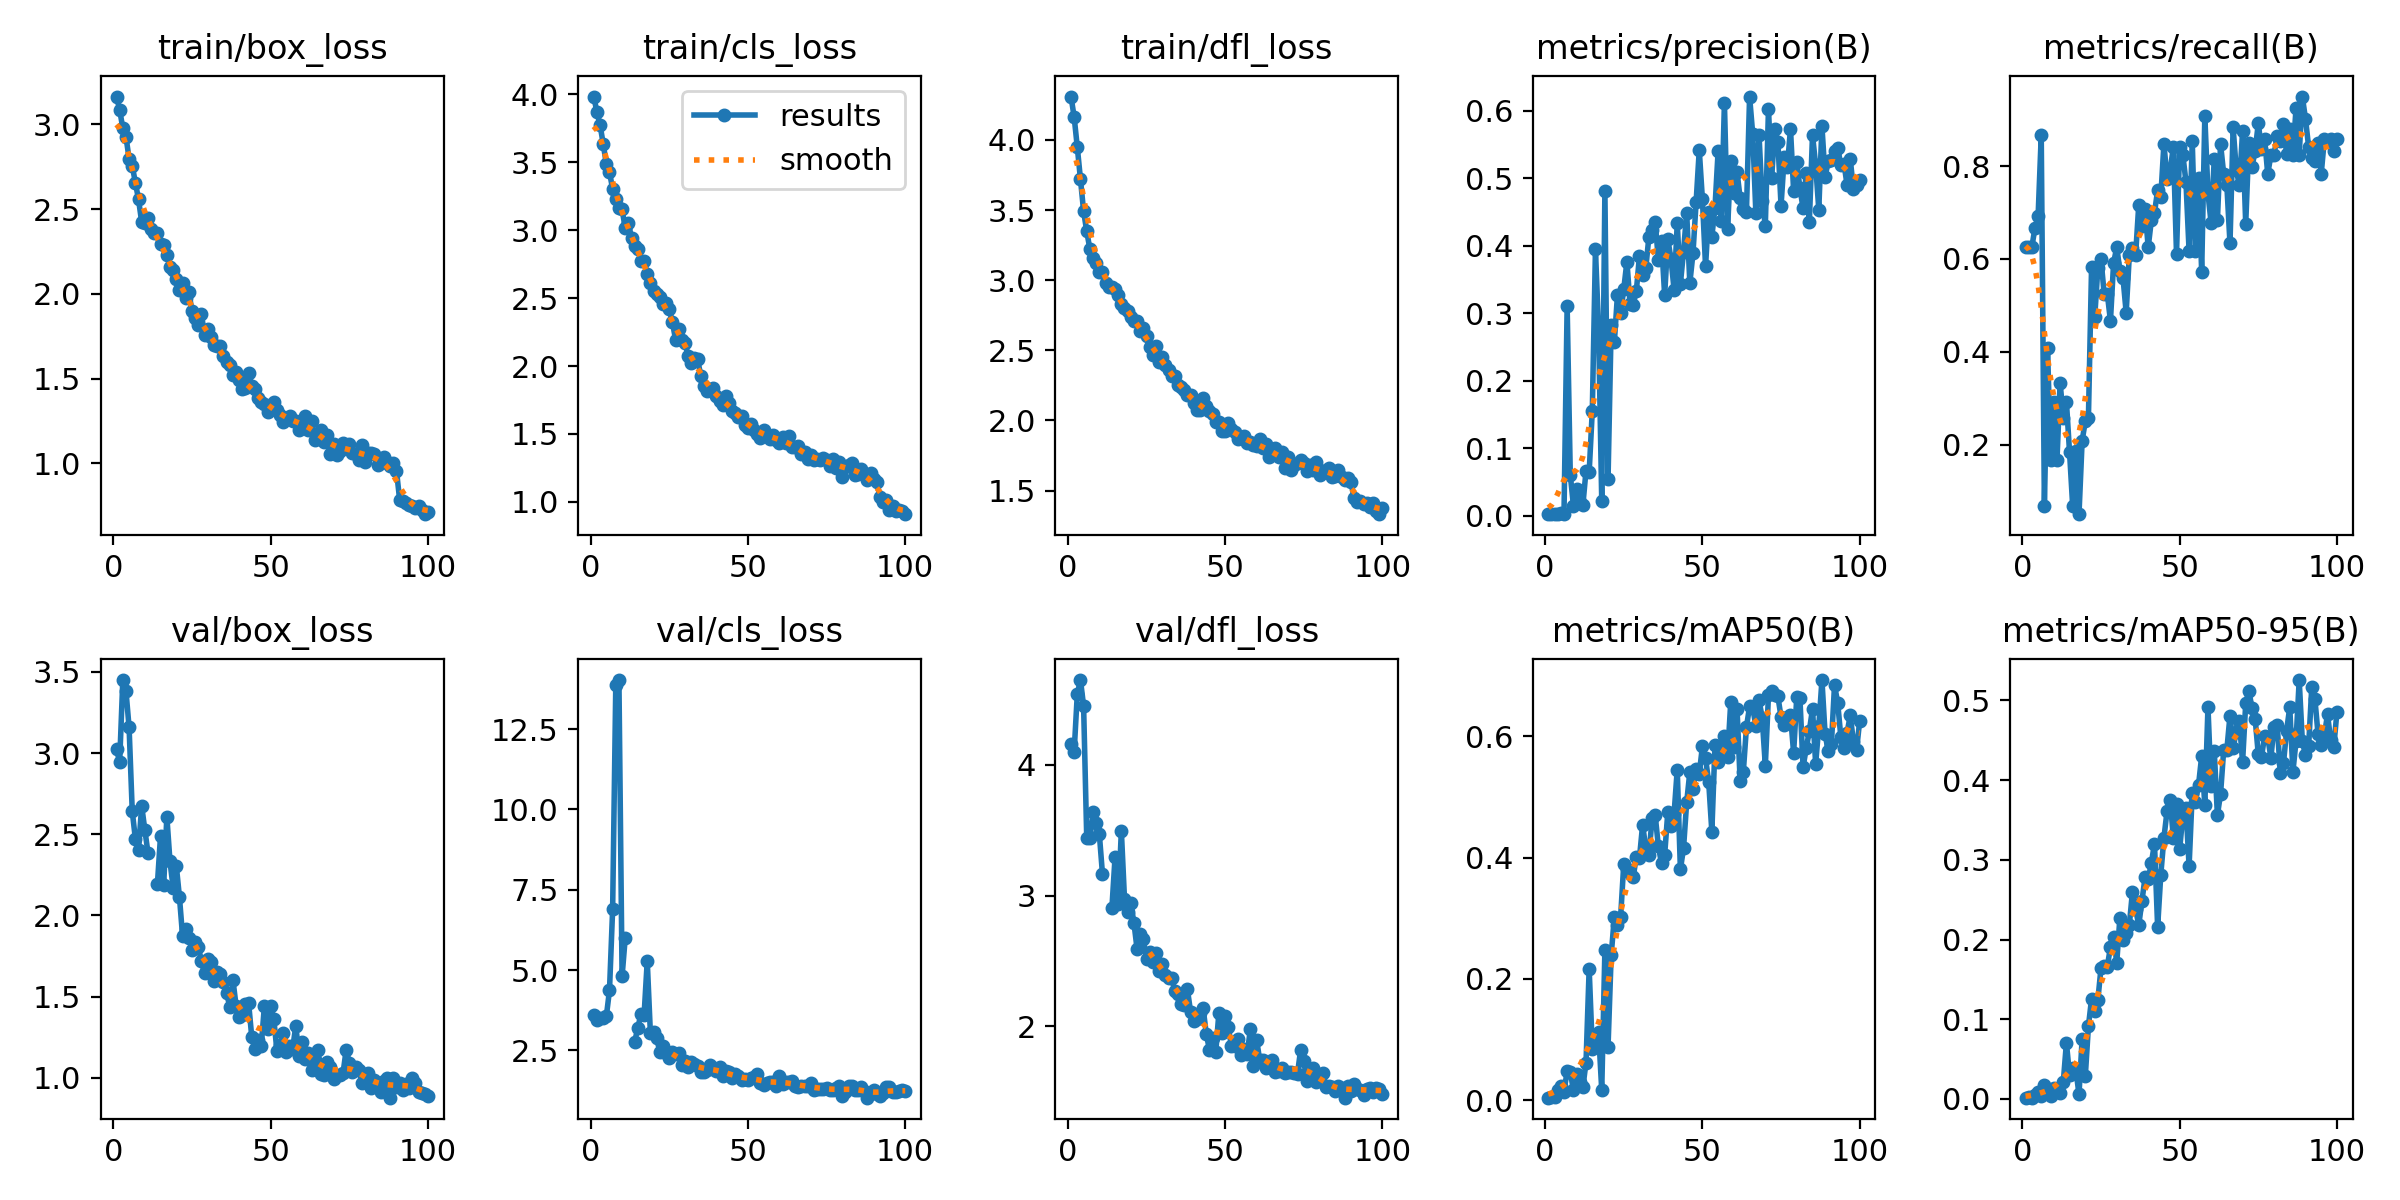

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
                                    images_directory_path=f"{dataset_location}/test/images",
                                    annotations_directory_path=f"{dataset_location}/test/labels",
                                    data_yaml_path=f"{data_yaml_path}"
                                  )
ds.classes

['BMW', 'mercedes-benz']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets     = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.692079207920792
mAP 50 0.8613861386138614
mAP 75 0.8613861386138614


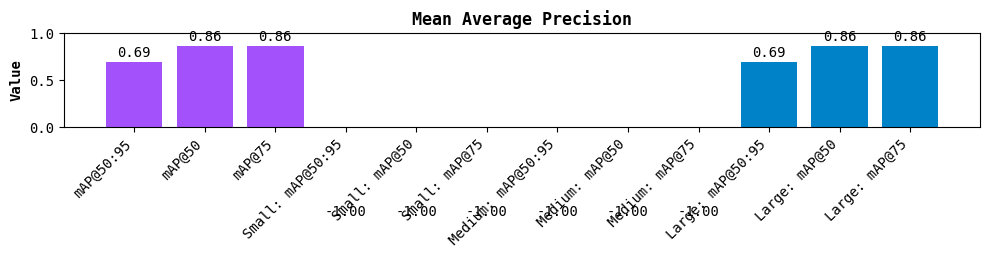

In [ ]:
map.plot()

## Run inference with fine-tuned YOLOv12 model

In [ ]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

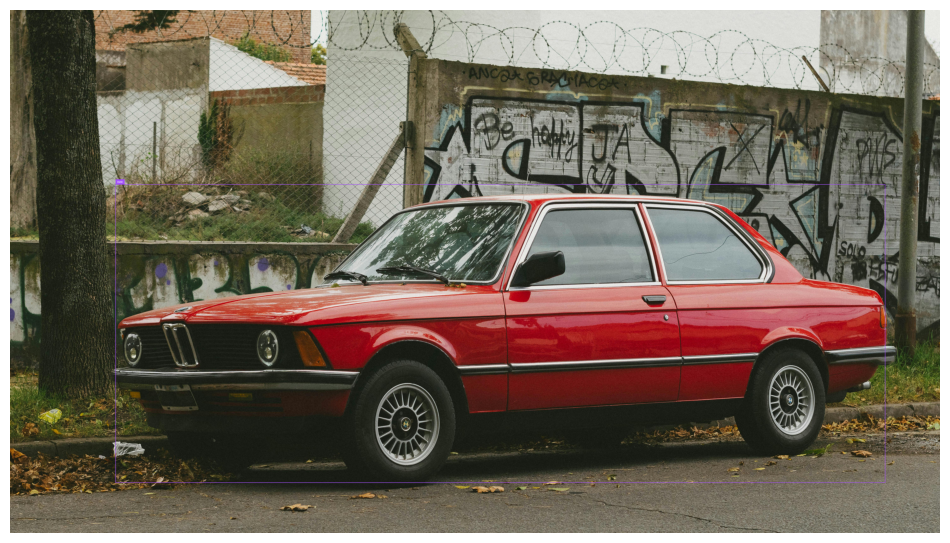

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

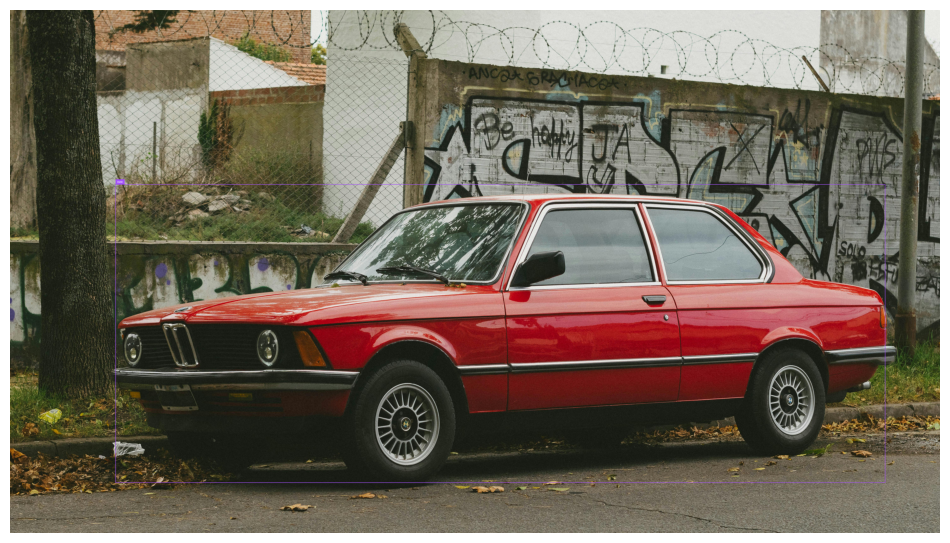

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

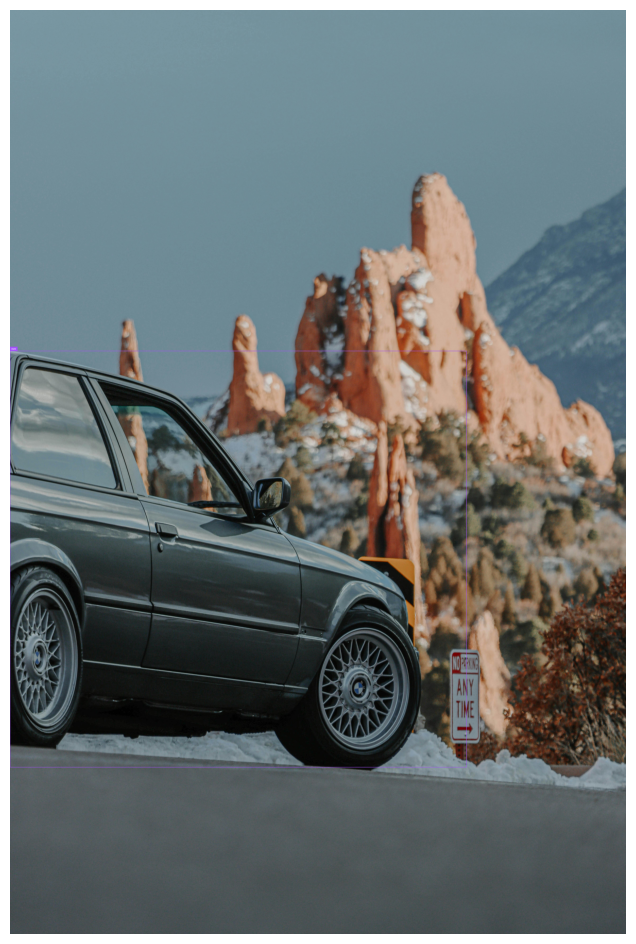

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
# !mkdir "/content/drive/MyDrive/3CTYOLOv12"

In [ ]:
# save results for later test
!zip -r "/content/drive/MyDrive/3CTYOLOv12/yolov12_makesense_experiment_results.zip" /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch1980.jpg (deflated 6%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding: content/runs/detect/train/P_curve.png (deflated 9%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 36%)
  adding: content/runs/detect/train/results.csv (deflated 61%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 42%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 11%)
  adding: content/runs/detect/train/train_batch1982.jpg (deflated 8%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 3%)
  adding: content/runs/detect/train/F1_curve.png (deflated 12%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png

In [28]:
from google.colab import files
uploaded = files.upload()

Saving BMW vs Mercedes.mp4 to BMW vs Mercedes.mp4


In [29]:
from ultralytics import YOLO

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

In [30]:
import cv2
import supervision as sv

input_path = "/content/BMW vs Mercedes.mp4"
output_path = "output_video.mp4"

cap = cv2.VideoCapture(input_path)

# VideoWriter setup
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'avc1'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame for YOLO
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Inference
    results = model(rgb_frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()

    # Annotate
    annotated = box_annotator.annotate(scene=frame.copy(), detections=detections)
    annotated = label_annotator.annotate(scene=annotated, detections=detections)

    out.write(annotated)  # write frame to output video

cap.release()
out.release()

In [32]:
from google.colab import files
files.download("/content/output_video.mp4")